In [1]:
    #import dependencies
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [3]:
#create set of random lat and long combinations
lats = np.random.uniform(-90,90,1500)
lngs =  np.random.uniform(-180,180,1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# use print function to display lat/long combos
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

17.852314259539924 -17.569314599266477
68.48868775751396 4.853433130301653
64.51668712296501 131.05621246334408
-88.92005247745603 -138.85932234794393
-68.23451042465427 -98.35556090866729
12.56456273802587 -167.79442522389536
18.146827769035113 78.00697801059567
-50.31584552733789 114.01529635253934
-14.510747337664881 -45.08863073586551
13.04492104959182 -119.01018805146688
70.67576583591739 168.72918389702755
10.063780120725113 -125.86518425787455
53.159191475953435 105.91656287284252
69.67324084347959 173.00044779908558
50.71969357341791 -123.83954268840084
56.03031253804545 1.4109073304279036
-77.96427504040818 -151.87326816799458
-68.47382588919447 15.591982198029683
-72.75123700404484 -126.27571001851545
24.146673657437844 -162.9409037181404
24.506605301043322 106.98784153700893
-16.27283800273763 -32.978736406372974
8.147363940904853 -69.98373108864223
46.479930212085435 -155.28967451548385
-22.05379431585554 31.41216845315509
-20.841065740213978 -168.15246707018517
-47.7087557

In [7]:
from citipy import citipy

In [10]:
#create a list for holding cities
cities = []
# identify nearest city for each lat/long
for coordinate in coordinates:
    city =  citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    # if unique, we'll add to cities list
    if city not in cities:
        cities.append(city)

#print city count to confirm sufficient count
len(cities)

627

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [16]:
# create empty list to hold weather data

city_data = []

#print beginning of logging

print('Beginning Data Retrieval     ')
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # run api request for each city

    try:

        #parse json and retrieve data

        city_weather = requests.get(city_url).json()

        # parse out the data we want

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nouakchott
Processing Record 2 of Set 1 | bud
Processing Record 3 of Set 1 | borogontsy
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | banswada
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | itacarambi
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | bayanday
Processing Record 13 of Set 1 | komsomolskiy
Processing Record 14 of Set 1 | powell river
Processing Record 15 of Set 1 | bridlington
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | bose
Processing Record 19 of Set 1 | belmonte
Processing Record 20 of Set 1 | barinas
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | chiredzi
Processing Record 23 of Set 1 | alofi
Processing Record 24 of Set 1 | busselton
Processing Record 25

In [18]:
len(city_data)

579

In [19]:
#convert array of dictionaries to dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouakchott,18.0858,-15.9785,98.53,34,43,10.09,MR,2022-06-12 12:22:53
1,Bud,39.4470,-86.1758,69.82,97,57,5.99,US,2022-06-12 12:22:53
2,Borogontsy,62.6683,131.1683,54.14,97,100,5.88,RU,2022-06-12 12:22:53
3,Rikitea,-23.1203,-134.9692,73.06,63,44,11.18,PF,2022-06-12 12:22:54
4,Punta Arenas,-53.1500,-70.9167,48.31,81,75,11.50,CL,2022-06-12 12:22:54
5,Kapaa,22.0752,-159.3190,76.12,86,40,20.71,US,2022-06-12 12:22:54
6,Banswada,18.3833,77.8833,87.48,51,99,5.66,IN,2022-06-12 12:22:55
7,Albany,42.6001,-73.9662,63.63,83,90,4.05,US,2022-06-12 12:20:57
8,Itacarambi,-15.1022,-44.0919,78.44,36,90,2.68,BR,2022-06-12 12:22:55
9,Cabo San Lucas,22.8909,-109.9124,79.90,71,6,12.03,MX,2022-06-12 12:22:11


In [20]:
new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]

In [23]:
#create output in csv
output_data_file = 'weather_data/cities.csv'
#export
city_data_df.to_csv(output_data_file,index_label='City_ID')

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

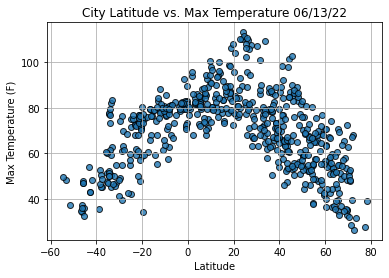

In [25]:
# import time module
import time

#build the scatter for lat vs max temp

plt.scatter(lats,
            max_temps,
            edgecolors='black', linewidths=1,marker='o', alpha=0.8, label='Cities')

#incorporate the other graph props
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save the fig
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()

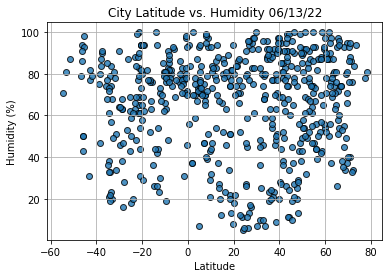

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

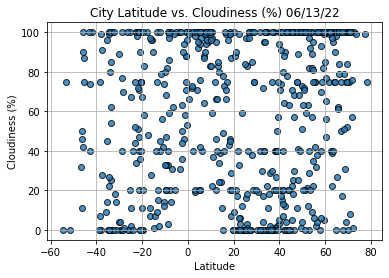

In [28]:
#build plot for lat vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolors='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#incorporate the other graph props
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the fig
plt.savefig('weather_data/Fig3.png')

#show plot
plt.show()

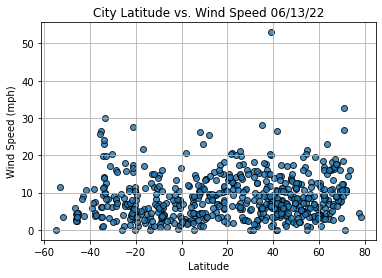

In [29]:
#build plot for lat vs cloudiness
plt.scatter(lats,
           wind_speed,
           edgecolors='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#incorporate the other graph props
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#save the fig
plt.savefig('weather_data/Fig4.png')

#show plot
plt.show()

In [48]:
# import linregress
from scipy.stats import linregress
# create a fn to perform linear regression on the weather data
# and plot a regression line and equation with the data

def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):

    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) =  linregress(x_values,y_values)

    #calc the regression line 'y values' from the slope and intercept

    regress_values = x_values * slope + intercept

    #get the eqn of the line

    line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

    #create a scatter plot and plot the regression line

    plt.scatter(x_values, y_values)

    plt.plot(x_values, regress_values,'r')

    #annotate the text for the line equation

    plt.annotate(line_eq,text_coordinates,fontsize=15,color='red')
    plt.title(title)
    plt.xlabel('Latitute')
    plt.ylabel(y_label)
    plt.show()
    print(f'Regression Summary:\n r value:{r_value}\n p value:{p_value}\n std error:{std_err}')

In [33]:
index13 = city_data_df.loc[13]
index13

City                 Powell River
Country                        CA
Date          2022-06-12 12:22:56
Lat                       49.8496
Lng                     -124.5361
Max Temp                    55.08
Humidity                       85
Cloudiness                     73
Wind Speed                   5.79
Name: 13, dtype: object

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouakchott,MR,2022-06-12 12:22:53,18.0858,-15.9785,98.53,34,43,10.09
1,Bud,US,2022-06-12 12:22:53,39.4470,-86.1758,69.82,97,57,5.99
2,Borogontsy,RU,2022-06-12 12:22:53,62.6683,131.1683,54.14,97,100,5.88
5,Kapaa,US,2022-06-12 12:22:54,22.0752,-159.3190,76.12,86,40,20.71
6,Banswada,IN,2022-06-12 12:22:55,18.3833,77.8833,87.48,51,99,5.66


In [36]:
#create northern and southern hemisphere df's
northern_hemi_df = city_data_df.loc[(city_data_df.Lat>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df.Lat<0)]

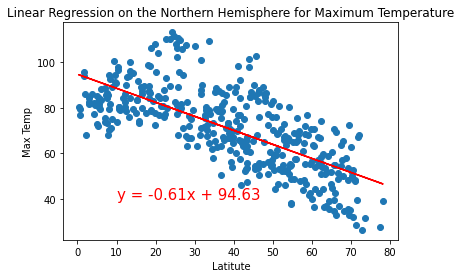

Regression Summary:
 r value:-0.7013906726761211
 p value:8.610995032576555e-61
 std error:0.031203114425443466


In [52]:
#linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Max Temp']
#call the fn
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

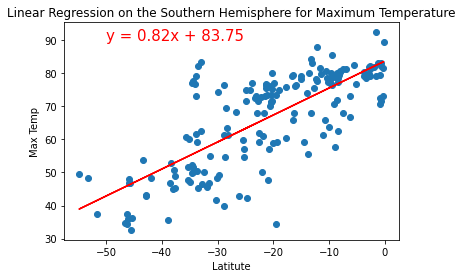

Regression Summary:
 r value:0.7505542157069633
 p value:2.6050344944872398e-33
 std error:0.054421445915005535


In [51]:
#linear regression on Northern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df['Max Temp']
#call the fn
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,90))

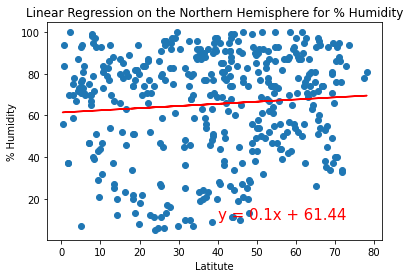

Regression Summary:
 r value:0.08259375122863073
 p value:0.09819470978950703
 std error:0.06262378904813598


In [50]:
#regression on northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
#call regr fn
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere\
 for % Humidity','% Humidity',(40,10))

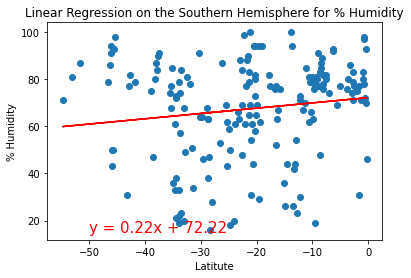

Regression Summary:
 r value:0.14146878863759443
 p value:0.06034805978520062
 std error:0.11884212249343627


In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Humidity', '% Humidity',(-50,15))

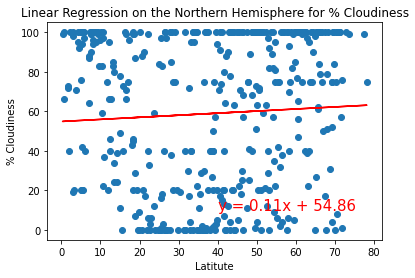

Regression Summary:
 r value:0.05519135855320509
 p value:0.26960219405671554
 std error:0.09512715298598139


In [53]:
# Linear regression on the Northern Hemisphere
var = 'Cloudiness'
format = '% '
location = 'Northern'
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df[var]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the '+location+' Hemisphere \
for '+ format + var, format + var,(40,10))

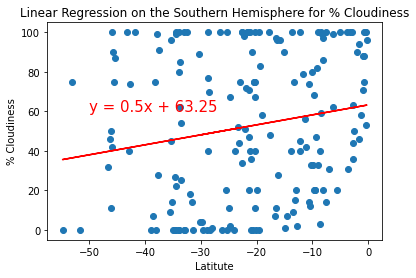

Regression Summary:
 r value:0.18200259159174476
 p value:0.01532880426028533
 std error:0.20619986628126272


In [55]:
# Linear regression on the Southern Hemisphere
var = 'Cloudiness'
format = '% '
location = 'Southern'
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df[var]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the '+location+' Hemisphere \
for '+ format + var, format + var,(-50,60))

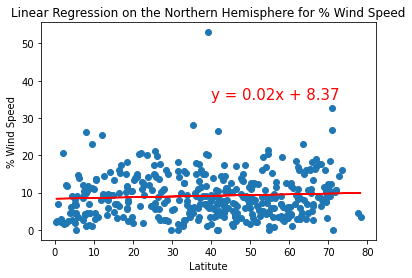

Regression Summary:
 r value:0.06629828230624513
 p value:0.1846419933847479
 std error:0.014814937534608006


In [56]:
# Linear regression on the Northern Hemisphere
var = 'Wind Speed'
format = '% '
location = 'Northern'
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df[var]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the '+location+' Hemisphere \
for '+ format + var, format + var,(40,35))

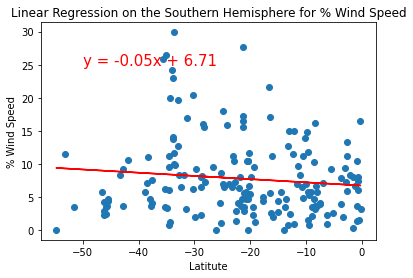

Regression Summary:
 r value:-0.11090047273311013
 p value:0.14169237291618011
 std error:0.03296676357604997


In [58]:
# Linear regression on the Northern Hemisphere
var = 'Wind Speed'
format = '% '
location = 'Southern'
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df[var]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the '+location+' Hemisphere \
for '+ format + var, format + var,(-50,25))